In [1]:
import pandas as pd

# Load dataset
file_path = "SuperStore_Sales_Dataset.csv"
df = pd.read_csv(file_path)

# Menampilkan informasi umum tentang dataset
df_info = df.info()

# Menampilkan beberapa baris pertama
df_head = df.head()

# Menampilkan ringkasan statistik deskriptif untuk kolom numerik
df_describe = df.describe()

df_info, df_head, df_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


(None,
    Row ID+O6G3A1:R6        Order ID  Order Date   Ship Date       Ship Mode  \
 0              4918  CA-2019-160304  01-01-2019  07-01-2019  Standard Class   
 1              4919  CA-2019-160304  02-01-2019  07-01-2019  Standard Class   
 2              4920  CA-2019-160304  02-01-2019  07-01-2019  Standard Class   
 3              3074  CA-2019-125206  03-01-2019  05-01-2019     First Class   
 4              8604  US-2019-116365  03-01-2019  08-01-2019  Standard Class   
 
   Customer ID      Customer Name    Segment        Country          City  ...  \
 0    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg  ...   
 1    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg  ...   
 2    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg  ...   
 3    LR-16915       Lena Radford   Consumer  United States   Los Angeles  ...   
 4    CA-12310  Christine Abelman  Corporate  United States   San Antonio  ...   
 
           Catego

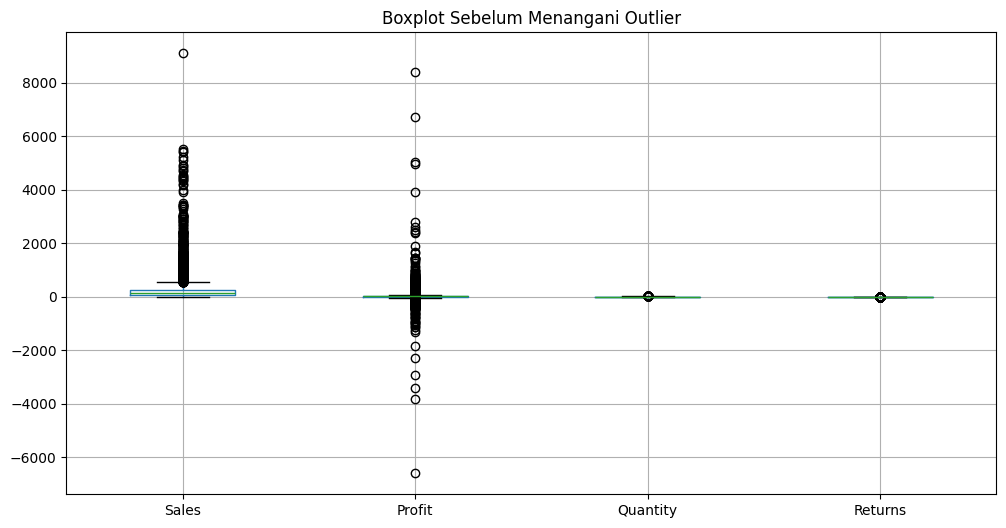

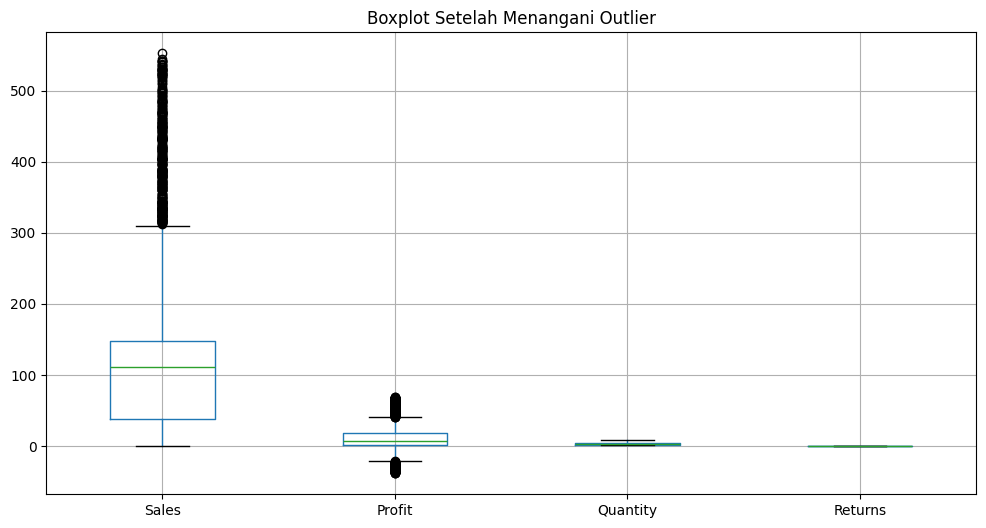

c:\Users\owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



📌 Informasi Dataset Setelah Preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 4353 entries, 0 to 5899
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales                     4353 non-null   float64
 1   Profit                    3700 non-null   float64
 2   Quantity                  4353 non-null   float64
 3   Returns                   4353 non-null   float64
 4   Shipping Duration         4353 non-null   int64  
 5   Category_Office Supplies  4353 non-null   bool   
 6   Category_Technology       4353 non-null   bool   
 7   Sub-Category_Appliances   4353 non-null   bool   
 8   Sub-Category_Art          4353 non-null   bool   
 9   Sub-Category_Binders      4353 non-null   bool   
 10  Sub-Category_Bookcases    4353 non-null   bool   
 11  Sub-Category_Chairs       4353 non-null   bool   
 12  Sub-Category_Copiers      4353 non-null   bool   
 13  Sub-Category_Envelopes  

<Figure size 1200x600 with 0 Axes>

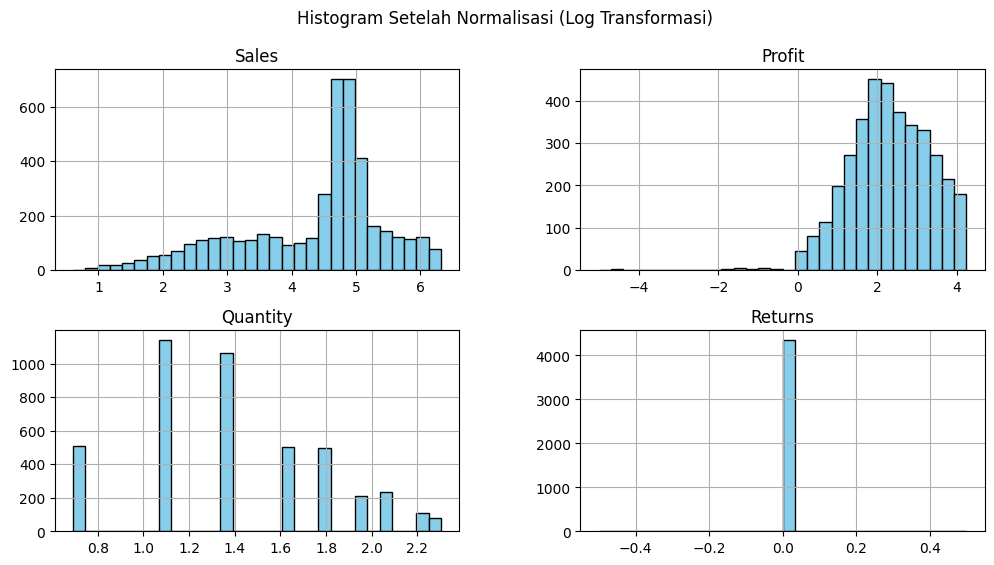

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (pastikan df sudah didefinisikan sebelumnya)
df_cleaned = df.copy()

# Menghapus kolom yang seluruhnya kosong
df_cleaned = df_cleaned.drop(columns=['ind1', 'ind2'], errors='ignore')

# Mengisi nilai yang hilang pada 'Returns' dengan 0
df_cleaned['Returns'] = df_cleaned['Returns'].fillna(0)

# Konversi 'Order Date' dan 'Ship Date' ke format datetime
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], format='%d-%m-%Y')
df_cleaned['Ship Date'] = pd.to_datetime(df_cleaned['Ship Date'], format='%d-%m-%Y')

# Tambahkan fitur baru dari 'Order Date' dan 'Ship Date'
df_cleaned['Order Year'] = df_cleaned['Order Date'].dt.year
df_cleaned['Order Month'] = df_cleaned['Order Date'].dt.month
df_cleaned['Order Day'] = df_cleaned['Order Date'].dt.day
df_cleaned['Shipping Duration'] = (df_cleaned['Ship Date'] - df_cleaned['Order Date']).dt.days

# Menghapus baris yang masih memiliki nilai kosong
df_cleaned = df_cleaned.dropna()

# Visualisasi box plot sebelum menangani outlier
plt.figure(figsize=(12, 6))
df_cleaned[['Sales', 'Profit', 'Quantity', 'Returns']].boxplot()
plt.title("Boxplot Sebelum Menangani Outlier")
plt.show()

# Menangani outlier dengan metode IQR
Q1 = df_cleaned[['Sales', 'Profit', 'Quantity', 'Returns']].quantile(0.25)
Q3 = df_cleaned[['Sales', 'Profit', 'Quantity', 'Returns']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df_cleaned[~((df_cleaned[['Sales', 'Profit', 'Quantity', 'Returns']] < lower_bound) | 
                          (df_cleaned[['Sales', 'Profit', 'Quantity', 'Returns']] > upper_bound)).any(axis=1)]

# Visualisasi box plot setelah menangani outlier
plt.figure(figsize=(12, 6))
df_cleaned[['Sales', 'Profit', 'Quantity', 'Returns']].boxplot()
plt.title("Boxplot Setelah Menangani Outlier")
plt.show()

# Normalisasi menggunakan log transformasi
df_cleaned['Sales'] = np.log1p(df_cleaned['Sales'])
df_cleaned['Profit'] = np.log1p(df_cleaned['Profit'])
df_cleaned['Quantity'] = np.log1p(df_cleaned['Quantity'])
df_cleaned['Returns'] = np.log1p(df_cleaned['Returns'])

# Encoding fitur kategorikal
df_encoded = pd.get_dummies(df_cleaned[['Category', 'Sub-Category', 'Ship Mode', 'Region', 'Payment Mode']], drop_first=True)

# Gabungkan fitur numerik dan hasil encoding
df_final = pd.concat([df_cleaned[['Sales', 'Profit', 'Quantity', 'Returns', 'Shipping Duration']], df_encoded], axis=1)

# Tampilkan informasi dataset setelah preprocessing
print("\n📌 Informasi Dataset Setelah Preprocessing:")
print(df_final.info())

# Ringkasan statistik setelah preprocessing
print("\n📌 Ringkasan Statistik:")
print(df_final.describe())

# Visualisasi distribusi setelah normalisasi
plt.figure(figsize=(12, 6))
df_final[['Sales', 'Profit', 'Quantity', 'Returns']].hist(bins=30, figsize=(12, 6), color='skyblue', edgecolor='black')
plt.suptitle("Histogram Setelah Normalisasi (Log Transformasi)")
plt.show()


deteksi dan penanganan outlier menggunakan metode Interquartile Range (IQR) pada kolom numerik utama, yaitu 'Sales', 'Profit', 'Quantity', dan 'Returns'. Kolom ini dipilih karena memiliki nilai transaksi yang dapat bervariasi secara ekstrem, sehingga outlier perlu diidentifikasi dan ditangani agar tidak mempengaruhi distribusi data secara signifikan.

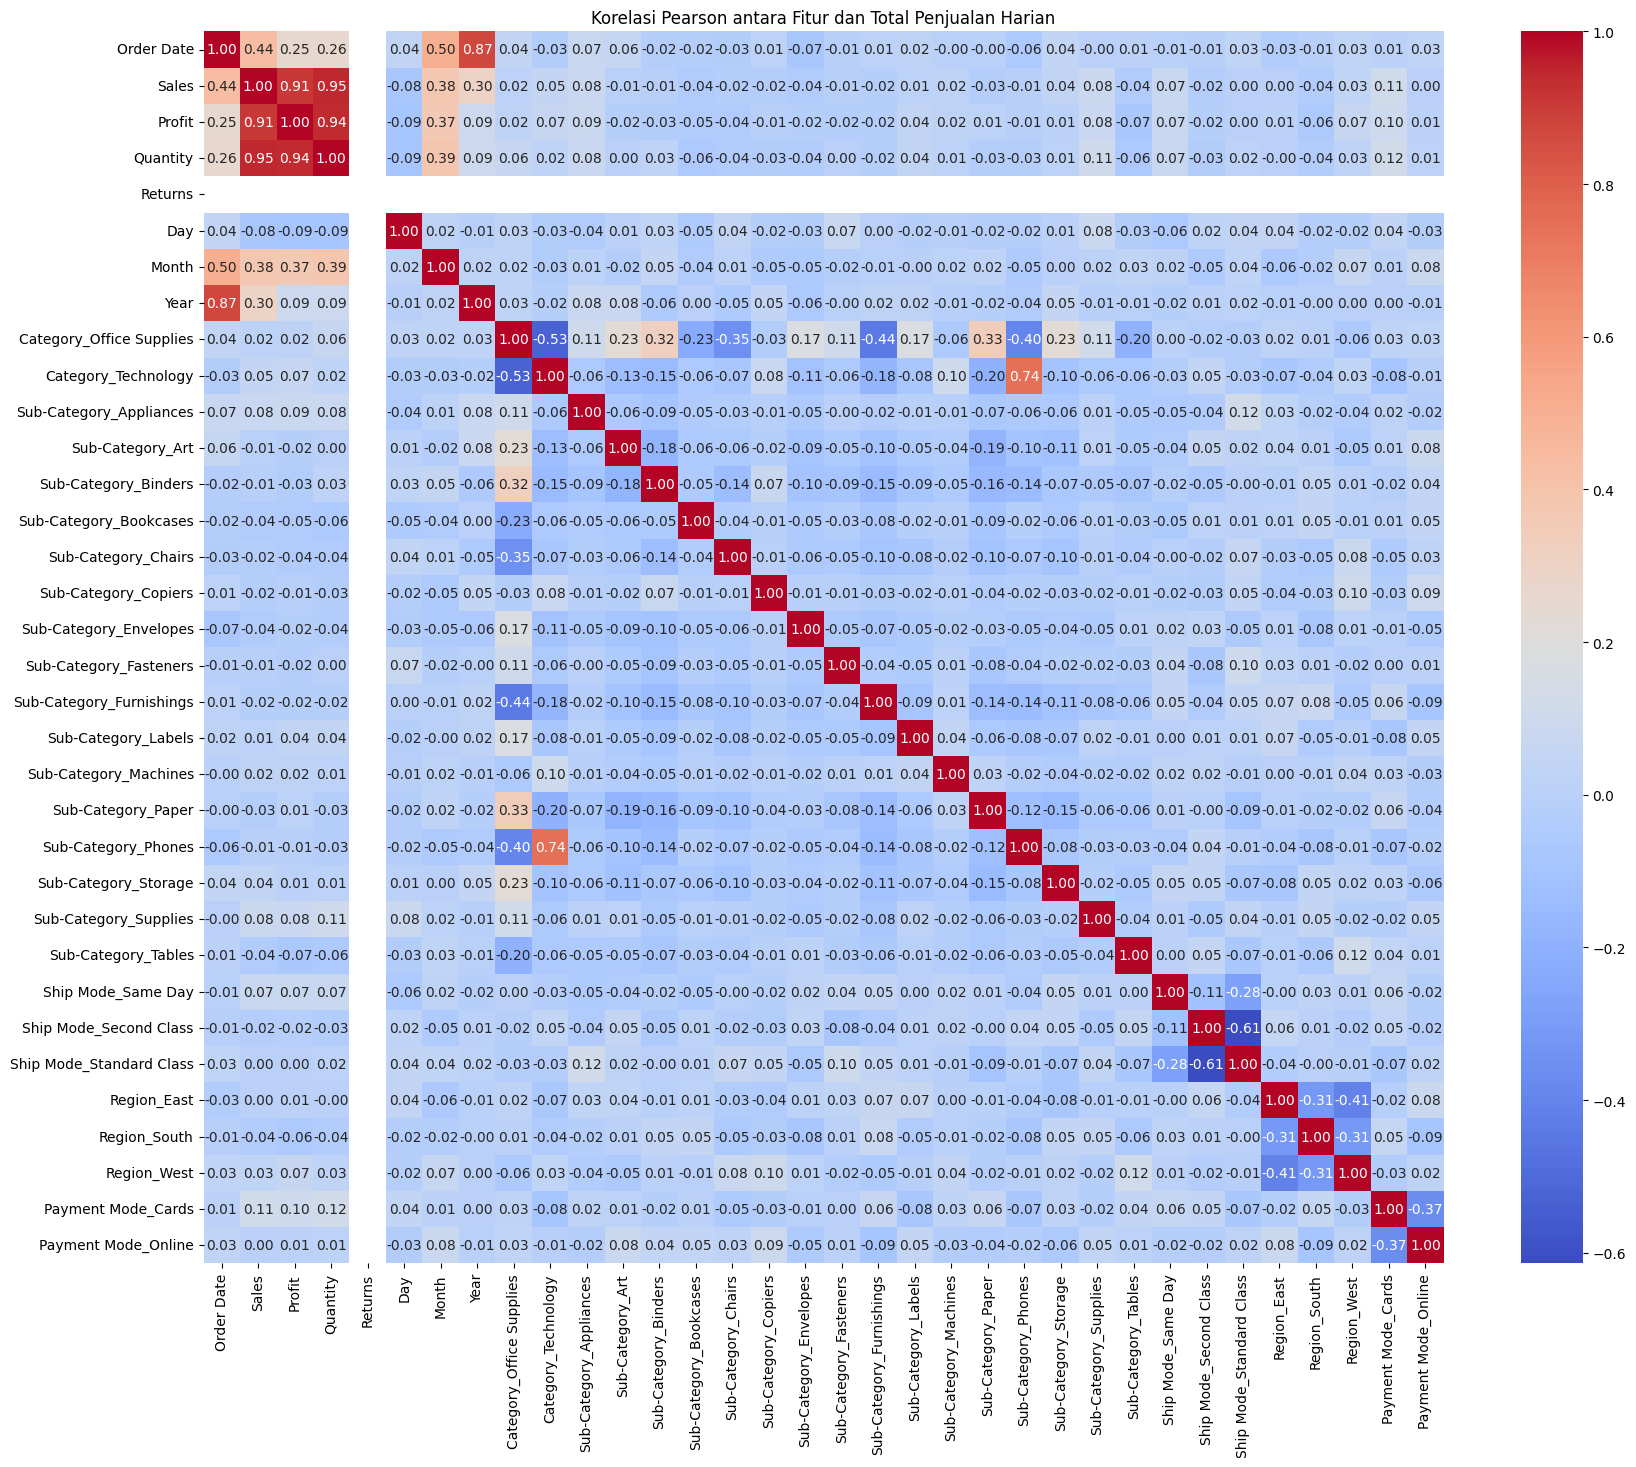

In [3]:
# Mengelompokkan total penjualan per hari
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])
daily_sales = df_cleaned.groupby('Order Date').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum', 'Returns': 'sum'}).reset_index()

# Menggabungkan fitur lain ke dataset total penjualan harian
df_daily = daily_sales.copy()
df_daily['Day'] = df_daily['Order Date'].dt.day
df_daily['Month'] = df_daily['Order Date'].dt.month
df_daily['Year'] = df_daily['Order Date'].dt.year

# Encoding fitur kategorikal dari data transaksi harian
df_encoded = pd.get_dummies(df_cleaned[['Category', 'Sub-Category', 'Ship Mode', 'Region', 'Payment Mode']], drop_first=True)
df_encoded = df_encoded.groupby(df_cleaned['Order Date']).mean().reset_index()

# Gabungkan dataset total penjualan harian dengan fitur kategorikal yang diencoding
df_final = df_daily.merge(df_encoded, on='Order Date', how='left')

# Menentukan fitur (X) dan target (y)
X = df_final.drop(columns=['Sales', 'Order Date'])
y = df_final['Sales']

# Metode 2: Korelasi Pearson
correlation_matrix = df_final.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Pearson antara Fitur dan Total Penjualan Harian")
plt.show()

In [ ]:
# Tentukan threshold untuk korelasi
threshold = 0.2

# Ambil korelasi antara fitur dan target (Sales)
corr_with_sales = correlation_matrix['Sales'].drop('Sales')  # Korelasi fitur dengan Sales

# Pilih fitur dengan korelasi absolut >= threshold
selected_features = corr_with_sales[abs(corr_with_sales) >= threshold].index.tolist()

# Tampilkan fitur terpilih berdasarkan threshold korelasi
print(f"Fitur terpilih berdasarkan korelasi ≥ {threshold}:")
print(selected_features)

# Dataframe X baru dengan fitur terpilih
X_selected = df_final[selected_features]
y = df_final['Sales']

Fitur terpilih berdasarkan korelasi ≥ 0.2:
['Order Date', 'Profit', 'Quantity', 'Month', 'Year']


Dengan threshold 0.2, hanya fitur yang memiliki hubungan cukup kuat dengan Sales yang dipertimbangkan.
Ini membantu menyaring fitur yang benar-benar berkontribusi dalam prediksi tanpa kehilangan terlalu banyak informasi.

In [28]:
# Dataset dengan fitur yang telah dipilih
X_selected = df_final[['Order Date', 'Profit', 'Quantity', 'Month', 'Year']]
y = df_final['Sales']

# Ubah 'Order Date' menjadi angka (misalnya jumlah hari sejak tanggal pertama)
X_selected['Order Date'] = (X_selected['Order Date'] - X_selected['Order Date'].min()).dt.days

# Konversi ke NumPy array untuk manipulasi lebih mudah
X_selected = X_selected.values
y = y.values

# Acak indeks secara random
np.random.seed(42)  # Untuk hasil yang konsisten
indices = np.arange(len(X_selected))
np.random.shuffle(indices)

# Tentukan proporsi split (80% train, 20% test)
split_ratio = 0.8
split_index = int(len(X_selected) * split_ratio)

# Pisahkan data berdasarkan indeks yang telah diacak
X_train, X_test = X_selected[indices[:split_index]], X_selected[indices[split_index:]]
y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]

# Cek ukuran dataset hasil split
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (497, 5), Testing set: (125, 5)


C:\Temp\ipykernel_10852\1938823655.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['Order Date'] = (X_selected['Order Date'] - X_selected['Order Date'].min()).dt.days


In [29]:
print(f"Jumlah baris sebelum agregasi: {len(df_cleaned)}")
print(f"Jumlah baris setelah agregasi harian: {len(df_final)}")

Jumlah baris sebelum agregasi: 4353
Jumlah baris setelah agregasi harian: 622


1. Jumlah Baris Sebelum Agregasi: 4,353
Ini adalah jumlah total transaksi dalam dataset sebelum dilakukan pengelompokan.
Setiap baris mewakili satu transaksi individual, di mana satu hari bisa memiliki banyak transaksi yang berasal dari berbagai pelanggan, produk, dan metode pembayaran.
2. Jumlah Baris Setelah Agregasi Harian: 622
Setelah dilakukan agregasi berdasarkan "Order Date", jumlah baris berkurang drastis karena transaksi yang terjadi pada hari yang sama digabungkan menjadi satu baris per hari.
Misalnya, jika pada 1 Januari 2021 terdapat 10 transaksi, maka semua transaksi tersebut dijumlahkan menjadi satu baris yang mewakili total penjualan, profit, jumlah barang yang terjual, dan jumlah retur pada hari tersebut.

MSE: 61.2776
RMSE: 7.8280
R² Score: 0.8829


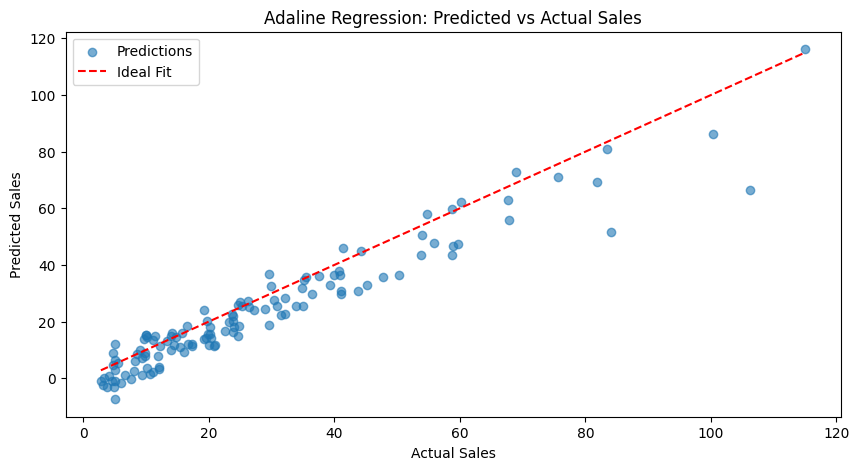

In [30]:
# Normalisasi Fitur (Standardization)
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X_train_scaled, mean_train, std_train = standardize(X_train)
X_test_scaled = (X_test - mean_train) / std_train  # Gunakan mean & std dari training data

# Implementasi Adaline dengan Gradien Descent
class AdalineGD:
    def __init__(self, eta=0.001, epochs=2000, tolerance=1e-4):
        self.eta = eta
        self.epochs = epochs
        self.tolerance = tolerance

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)  # Termasuk bias
        self.losses = []

        for epoch in range(self.epochs):
            net_input = self.net_input(X)
            errors = y - net_input
            loss = (errors ** 2).mean() / 2  # Mean Squared Error (MSE)
            self.losses.append(loss)

            # Update bobot dengan Gradien Descent
            self.weights[1:] += self.eta * X.T.dot(errors) / len(y)
            self.weights[0] += self.eta * errors.mean()  # Bias update

            # Early Stopping jika perbaikan loss kecil
            if epoch > 0 and abs(self.losses[-2] - self.losses[-1]) < self.tolerance:
                print(f"Stopped at epoch {epoch}")
                break

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return self.net_input(X)

# Melatih Model
adaline = AdalineGD(eta=0.001, epochs=2000)
adaline.fit(X_train_scaled, y_train)

# Memprediksi Data Uji
y_pred = adaline.predict(X_test_scaled)

# Evaluasi Metrik
mse = ((y_test - y_pred) ** 2).mean()
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualisasi Perbandingan
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Ideal Fit")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Adaline Regression: Predicted vs Actual Sales")
plt.legend()
plt.show()


In [31]:
# Membandingkan hasil prediksi dengan nilai aktual
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Menampilkan beberapa sampel
comparison_df

,Actual,Predicted
0,53.917706,50.681646
1,23.928297,16.169786
2,19.227753,24.139952
3,25.266895,25.546380
4,23.902496,20.341825
...,...,...
120,6.700653,0.992620
121,14.417117,11.750101
122,13.397114,13.070129
123,45.198531,33.052623


# MENGGUNAKAN LIBRARY

C:\Temp\ipykernel_10852\3059110964.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['Order Date'] = (X_selected['Order Date'] - X_selected['Order Date'].min()).dt.days


Training set: (497, 5), Testing set: (125, 5)
MSE: 27.1212
RMSE: 5.2078
R² Score: 0.9410


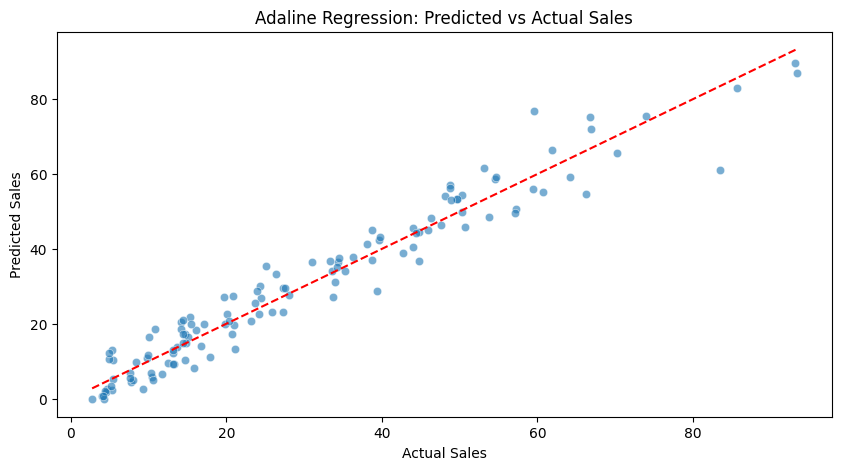

In [32]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.model_selection import train_test_split

# Dataset dengan fitur yang telah dipilih
X_selected = df_final[['Order Date', 'Profit', 'Quantity', 'Month', 'Year']]
y = df_final['Sales']

# Ubah 'Order Date' menjadi angka (misalnya jumlah hari sejak tanggal pertama)
X_selected['Order Date'] = (X_selected['Order Date'] - X_selected['Order Date'].min()).dt.days

# Split data 80% train, 20% test
X_trainL, X_testL, y_trainL, y_testL = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Cek ukuran dataset hasil split
print(f"Training set: {X_trainL.shape}, Testing set: {X_testL.shape}")

# Normalisasi Fitur
scaler = StandardScaler()
X_trainL_scaled = scaler.fit_transform(X_trainL)
X_testL_scaled = scaler.transform(X_testL)

# Model Adaline dengan Perbaikan
adaline = SGDRegressor(loss='squared_error', 
                       max_iter=2000,    # Meningkatkan jumlah iterasi
                       eta0=0.001,       # Learning rate yang lebih stabil
                       learning_rate='constant', 
                       early_stopping=True, # Menghentikan training jika tidak ada perbaikan
                       validation_fraction=0.2, 
                       random_state=42)

# Melatih Model
adaline.fit(X_trainL_scaled, y_trainL)

# Memprediksi Data Uji
y_predL = adaline.predict(X_testL_scaled)

# Evaluasi Metrik
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_testL, y_predL)
rmse = np.sqrt(mse)
r2 = r2_score(y_testL, y_predL)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualisasi Perbandingan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

comparison = pd.DataFrame({'Actual': y_testL.values, 'Predicted': y_predL})

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_testL, y=y_predL, alpha=0.6)
plt.plot([y_testL.min(), y_testL.max()], [y_testL.min(), y_testL.max()], '--', color='red')  
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Adaline Regression: Predicted vs Actual Sales")
plt.show()


In [26]:
comparison_lb = pd.DataFrame({'Actual': y_testL, 'Predicted': y_predL})

# Menampilkan beberapa sampel
comparison_lb

,Actual,Predicted
249,9.757554,10.814385
399,19.663134,27.138376
174,10.400318,5.917529
280,46.282756,48.247796
110,27.280552,29.503310
...,...,...
6,16.716110,14.060477
104,20.392927,20.668735
114,14.660461,10.274437
354,14.488877,21.061781
